CIENCIA DE DATOS
ACTIVIDAD SEMANA 6 VIZUALIZACIÓN


URL de los datos originales:
https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv
URL de la descripción de los datos originales
https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


Comenzamos con la importacion de librerias

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



 
Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()
.

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
print('El contenido de mi dataset es:-----------------------------------------')
print(df)
print('El tamano de mi data set es:-------------------------------------------')
print(df.shape)
print('El DataSet contiene las siguientes columnas:---------------------------')
print(df.columns)
print('Los encabezados de mi Data Set son:------------------------------------')
print(df.head())
print('Los tipos de datos de las columnas de mi Data Set son:-----------------')
print(df.dtypes)
print('El resumen de datos de mi Data Set son:--------------------------------')
print(df.info())
print('Los datos nulos de mi Data Set son:------------------------------------')
print(df.isna())
print('total de datos nulos de mi Data Set son:-------------------------------')
print(df.isna().sum())

El contenido de mi dataset es:-----------------------------------------
          ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15  \
0          1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0   
1          2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   
2          3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0   
3          4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0   
4          5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0   
...      ...     ...  ...  ...  ...   ...  ...  ...  ...  ...  ...      ...   
29995  29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  ...  88004.0   
29996  29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  ...   8979.0   
29997  29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  ...  20878.0   
29998  29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  ...  52774.0   
29999  30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0

Creamos un nuevo DataSet llamado df_cleaned que contendra los datos limpios e imputaciones


In [3]:
df_cleaned = df.copy()
df_cleaned

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Modificamos loe encabezados d enuestro nuevo dataset para compender mejor y realizar un mejora analisis

In [4]:
#nombre_actual = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']
#nuevo_nombre = ['monto_credito','genero','educacion','estado_civil','edad','pago_sept','pago_ago','pago_jul','pago_jun','pago_may','pago_abr','deuda_sept','deuda _ago','deuda _jul','deuda _jun','deuda _may','deuda _abr', 'abono_sept','abono _ago','abono _jul','abono _jun','abono _may','abono _abr']

df_cleaned.rename(columns={'X1':'monto_credito','X2':'genero','X3':'educacion','X4':'estado_civil','X5':'edad','X6':'pago_sept','X7':'pago_ago','X8':'pago_jul','X9':'pago_jun','X10':'pago_may','X11':'pago_abr'},inplace=True)
df_cleaned

,ID,monto_credito,genero,educacion,estado_civil,edad,pago_sept,pago_ago,pago_jul,pago_jun,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


#

Limpia los datos eliminando los registros nulos o rellena con la media de la columna


In [5]:
#Primero renombramos las columnas y vemos su valores unicos para hacer la limpieza
#Considerando que las columnas numericas pueden tener mas de 100,000 valores unicos, esta comprobacion se hace unicamente con las categoricas
categoricas=['genero','educacion','estado_civil', 'pago_sept','pago_ago','pago_jul','pago_jun','pago_may','pago_abr']

print('variables unicas de genero', np.unique(df_cleaned['genero']))
print('variables unicas de educacion', np.unique(df_cleaned['educacion']))
print('variables unicas de estado_civil', np.unique(df_cleaned['estado_civil']))
print('variables unicas de pago septiembre', np.unique(df_cleaned['pago_sept']))
print('variables unicas de pago agosto', np.unique(df_cleaned['pago_ago']))
print('variables unicas de pago julio', np.unique(df_cleaned['pago_jul']))
print('variables unicas de pago junio', np.unique(df_cleaned['pago_jun']))
print('variables unicas de pago mayo', np.unique(df_cleaned['pago_may']))
print('variables unicas de pago abril', np.unique(df_cleaned['pago_abr']))

variables unicas de genero [ 1.  2. nan]
variables unicas de educacion [ 0.  1.  2.  3.  4.  5.  6. nan]
variables unicas de estado_civil [ 0.  1.  2.  3. nan]
variables unicas de pago septiembre [-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8. nan]
variables unicas de pago agosto [-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8. nan]
variables unicas de pago julio [-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8. nan]
variables unicas de pago junio [-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8. nan]
variables unicas de pago mayo [-2. -1.  0.  2.  3.  4.  5.  6.  7.  8. nan]
variables unicas de pago abril [-2. -1.  0.  2.  3.  4.  5.  6.  7.  8. nan]


Ese analisis nos permite observar que hay variables que no coinciden con la descripcion del dataset. Por ejemplo en la columna genero, donde deberia de ser 1 y 2, existe un elemento intermedio 1.6, lo que nos indica que nuestro dataset esta sucio.

Monto de Credito = Numerico
Genero = 1-2
Educación = 1-4
Estado civil = 1 – 3
Edad = Numérico
Pagos sept-abri = -1,1-8
Adeudos sept-abr = numerico
Abonos sept-abril = Numerico


In [6]:

#for i,j in nombre_actual,nuevo nombre:
#df.rename(columns={i:j}, inplace=True)
#df.rename(columns={nombre_actual:nuevo_nombre}, inplace=True)

categoricas=['genero','educacion','estado_civil', 'pago_sept','pago_ago','pago_jul','pago_jun','pago_may','pago_abr']
numericas= ['monto_credito','edad','deuda_sept','deuda _ago','deuda _jul','deuda _jun','deuda _may','deuda _abr', 'abono_sept','abono _ago','abono _jul','abono _jun','abono _may','abono _abr']

#Si decidimos eliminar los datos nulos
# df_clean= df.dropna()

#PAra rellenarlos usamos el fillna , para Fill NA/NaN values using the specified method.

#valor_promedio = df['columna'].mean()

#df['columna'].fillna(value=valor_promedio, inplace=True)

#Para muchas columnas lo hacemos como ciclo que primero obtenga los pormedios de cada columna y despues los rellene
for columnas in df_cleaned.columns:
  promedio = df_cleaned[columnas].mean() #Recordar que usamos el promedio, porque todos los valores son numericos, si hubiera categoricos o binarios usariamos la media
  df_cleaned[columnas].fillna(value = promedio, inplace=True)
print('total de datos nulos de mi Data Set despues de la limpieza son:-------------------------------')
print(df_cleaned.isna().sum())
df_cleaned

total de datos nulos de mi Data Set despues de la limpieza son:-------------------------------
ID               0
monto_credito    0
genero           0
educacion        0
estado_civil     0
edad             0
pago_sept        0
pago_ago         0
pago_jul         0
pago_jun         0
pago_may         0
pago_abr         0
X12              0
X13              0
X14              0
X15              0
X16              0
X17              0
X18              0
X19              0
X20              0
X21              0
X22              0
X23              0
Y                0
dtype: int64


,ID,monto_credito,genero,educacion,estado_civil,edad,pago_sept,pago_ago,pago_jul,pago_jun,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión


In [7]:
print('Los datos descriptivos del DataSet son:--------------------------------')
print(df_cleaned.describe())
df_cleaned.describe()


Los datos descriptivos del DataSet son:--------------------------------
                 ID   monto_credito        genero     educacion  estado_civil  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603753      1.853057      1.551903   
std     8660.398374   129747.661567      0.489117      0.790293      0.521950   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

               edad     pago_sept      pago_ago      pago_jul      pago_jun  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.484214     -0.016635     -0

,ID,monto_credito,genero,educacion,estado_civil,edad,pago_sept,pago_ago,pago_jul,pago_jun,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489117,0.790293,0.521950,9.217256,1.123773,1.197154,1.195908,1.168977,...,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677,0.415034
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Mi primer observacion es que los valores estan muy dispersos, es decir, se observan desde valores peque;os 1 y 0, hata valores de 30,000 y 100,000, pero por el momento no nos preocuparemos de eso, debido aque posteriormente se ralizara el escalamiento estandariado, lo cual regulara este problema
Tambien se puede observar que en el genero, mas del 75 % de los datos son ingresados son de mujeres, en la caracteriscica de educacion, mas del 75% de los datos ingresados son a personas con estudios universitarios y lo mismo con estado civil, mas del 75% de los datos corresponden a personas solteras.

Tambien se observa que las medidas de tendencia no tienen mucho sentido cuando se trata de variables categoricas, por ejemplo el promedio, no tiene sentido cuando se trata de variables de genero entre 1 y 2, en esos casos la moda tiene mas sentido y funcionalidad en el analisis de los datos

Como se observa, esta descripcion nos facilita la interpretacion rapida de elementos cartegoricos, pero no ocurre lo mismo con las variables numericas, ya que sus cifras nos dicen cosas diferentes, o tienen otra forma de relacionarse.

Otra cosa a considerarse, es que la misma descripcion de la libreria y el metodo describe indica que estos tienen enfoque en las variables numericas como a continuacion se transcribe:

For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

Realiza el conteo de las variables categóricas


In [8]:
#categoricas=['genero','educacion','estado_civil','pago_sept','pago_ago','pago_jul','pago_jun','pago_may','pago_abr']

print("sumatoria de:"+str(df_cleaned['genero'].value_counts())) #Aqui poner las X1, o la X que corresponda si no has renombrado tu columna
print("sumatoria de:"+str(df_cleaned['educacion'].value_counts()))
print("sumatoria de:"+str(df_cleaned['estado_civil'].value_counts()))
print("sumatoria de:"+str(df_cleaned['pago_sept'].value_counts()))
print("sumatoria de:"+str(df_cleaned['pago_ago'].value_counts()))
print("sumatoria de:"+str(df_cleaned['pago_jul'].value_counts()))
print("sumatoria de:"+str(df_cleaned['pago_jun'].value_counts()))
print("sumatoria de:"+str(df_cleaned['pago_may'].value_counts()))
print("sumatoria de:"+str(df_cleaned['pago_abr'].value_counts()))

sumatoria de:2.000000    18112
1.000000    11887
1.603753        1
Name: genero, dtype: int64
sumatoria de:2.000000    14030
1.000000    10585
3.000000     4915
5.000000      280
4.000000      123
6.000000       51
0.000000       14
1.853057        2
Name: educacion, dtype: int64
sumatoria de:2.000000    15964
1.000000    13657
3.000000      323
0.000000       54
1.551903        2
Name: estado_civil, dtype: int64
sumatoria de: 0.000000    14736
-1.000000     5684
 1.000000     3688
-2.000000     2759
 2.000000     2667
 3.000000      322
 4.000000       76
 5.000000       26
 8.000000       19
 6.000000       11
 7.000000        9
-0.016635        3
Name: pago_sept, dtype: int64
sumatoria de: 0.000000    15728
-1.000000     6047
 2.000000     3927
-2.000000     3782
 3.000000      326
 4.000000       99
 1.000000       28
 5.000000       25
 7.000000       20
 6.000000       12
-0.133689        5
 8.000000        1
Name: pago_ago, dtype: int64
sumatoria de: 0.000000    15761
-1.000000 

Escala los datos, si consideras necesario


In [9]:
X = df_cleaned.loc[:, df.columns != 'Y'].values #Seleccionamos las X, separando todas las columnas, excepto la columna Y
Y = df_cleaned['Y'].values #Seleccionamos las columnas en y
X_escalada = StandardScaler().fit_transform(X) #Aqui nos cambia los encabezados de nuestras columnas

#Ahora tenemos que meter a un dataframe lo escalado
df_escalado = pd.DataFrame(X_escalada) #esto nos convierte a formato dataframe
df_escalado

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.731993,-1.136720,0.810140,0.185938,-1.057405,-1.245968,1.794552,1.782331,-0.697050,-0.666577,...,-0.668203,-0.672731,-0.663322,-0.652911,-0.341931,-0.227145,-0.296813,-0.308143,-0.314201,-0.293426
1,-1.731878,-0.365981,0.810140,0.185938,0.858519,-1.028980,-0.875071,1.782331,0.139148,0.188886,...,-0.639463,-0.621867,-0.606489,-0.598151,-0.341931,-0.213647,-0.240013,-0.244309,-0.314201,-0.180922
2,-1.731762,-0.597202,0.810140,0.185938,0.858519,-0.161028,0.014803,0.111674,0.139148,0.188886,...,-0.482609,-0.449952,-0.417433,-0.391805,-0.250273,-0.191946,-0.240013,-0.244309,-0.248747,-0.012165
3,-1.731647,-0.905498,0.810140,0.185938,-1.057405,0.164454,0.014803,0.111674,0.139148,0.188886,...,0.032672,-0.232583,-0.186958,-0.156743,-0.221170,-0.169420,-0.228653,-0.237926,-0.244230,-0.237174
4,-1.731531,-0.905498,-1.234395,0.185938,-1.057405,2.334333,-0.875071,0.111674,-0.697050,0.188886,...,-0.161373,-0.347213,-0.348378,-0.331654,-0.221170,1.334985,0.271182,0.266363,-0.269103,-0.255231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.731531,0.404759,-1.234395,1.451312,-1.057405,0.381442,0.014803,0.111674,0.139148,0.188886,...,2.326634,0.695313,-0.149486,-0.384567,0.171302,0.610994,-0.012645,-0.113641,0.013071,-0.237174
29996,1.731647,-0.134759,-1.234395,1.451312,0.858519,0.815417,-0.875071,-0.723654,-0.697050,-0.666577,...,-0.627638,-0.533150,-0.577948,-0.652911,-0.231012,-0.104013,0.214269,-0.299909,-0.314201,-0.293426
29997,1.731762,-1.059646,-1.234395,0.185938,0.858519,0.164454,3.574301,2.617659,1.811545,-0.666577,...,-0.638367,-0.348177,-0.324756,-0.327859,-0.341931,-0.257049,0.952777,-0.040040,-0.183292,-0.119044
29998,1.731878,-0.674276,-1.234395,1.451312,-1.057405,0.598430,0.904677,-0.723654,0.139148,0.188886,...,0.422219,0.147654,-0.468312,0.168981,4.844741,-0.109091,-0.229903,-0.185199,3.152532,-0.191947


Reduce las dimensiones con PCA, si consideras necesario.


In [10]:
mi_pca = PCA(n_components = 8) 
componentes_principales = mi_pca.fit_transform(X_escalada)
 
print('Forma antes de PCA: ', X_escalada.shape)
print('Forma despues de aplicar el  PCA: ', componentes_principales.shape)
 
#Hacemos un nuevo dataframe que ponemos el orden de las columnas que deseemos, porque el pca, queda sin encabezado
df_con_pca = pd.DataFrame( data=componentes_principales, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

# Las etiquetas de nuestas variables objetivo osea las y, las ponemos a gusto
target_names = {0.0:'Mal Cliente',1.0:'Buen Cliente'}
 
df_con_pca['Y'] = Y #aqui estamos a;adiendo la columna de y a nuestro dataframe que contiene el PCA 

df_con_pca['Y'] = df_con_pca['Y'].map(target_names) #Y aqui sustituimos la columna y, con 
 
df_con_pca.head()

print(mi_pca.explained_variance_ratio_) 

mi_pca.explained_variance_ratio_.sum()
df_con_pca

Forma antes de PCA:  (30000, 24)
Forma despues de aplicar el  PCA:  (30000, 8)
[0.27262814 0.1708037  0.06470636 0.06140222 0.04366079 0.0410647
 0.03956638 0.03780477]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Y
0,-1.899819,-0.945027,-0.378068,-0.641672,-0.188531,-1.784029,0.927007,-0.494953,Buen Cliente
1,-0.776972,-2.148734,1.199029,-0.546500,-0.194490,-1.638278,0.525623,0.168307,Buen Cliente
2,-0.859296,-1.111687,0.517336,-0.515441,-0.315911,-1.583699,0.806041,-0.030022,Mal Cliente
3,-0.208204,-0.848400,-0.723999,0.181111,-0.318525,-1.878035,0.597689,0.360395,Mal Cliente
4,-0.852356,-0.111295,-0.943190,2.200559,-1.859438,-0.428024,1.284651,0.836967,Mal Cliente
...,...,...,...,...,...,...,...,...,...
29995,2.534862,0.731406,-1.764627,0.557124,0.628612,1.906909,0.589424,-0.363534,Mal Cliente
29996,-1.764310,-0.010413,-0.529514,0.616488,0.622643,2.313365,0.648358,-0.333609,Mal Cliente
29997,0.367650,-3.273781,0.496962,0.581660,0.118555,2.288791,-0.270558,-0.773548,Buen Cliente
29998,0.661877,0.762098,0.369982,2.981861,0.696467,1.620563,1.034618,-1.826541,Buen Cliente


In [11]:
mi_pca.explained_variance_ratio_.sum()

0.7316370720418759

Seleccionamos 8 vectores para el PCA, porque ddespues de realiar varias pruebas, se observ[o que estos elementos contenian mas del 70% solicitado para este ejercicio

Indica la varianza de los datos explicada por cada componente seleccionado. 

In [12]:
#Variabza usamo el atributo explained_variance_
mi_pca.explained_variance_
#Otra forma de ver la varianza es a travez de la funcion de cov de nyumpy
# Considerese, que para esta revision, se tomo el dataframe original, antes del PCA
varianza = np.cov(df_cleaned.T)
varianza

#Podemos ver la correlaci[on de los datos
df_con_pca.corr()
#Por el momento no deseamos imprimir el heatmap
#sns.set(rc={'figure.figsize':(20,20)}) 
#sns.heatmap(varianza, cmap = 'BuGn', annot=True,)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
PC1,1.000000e+00,3.289890e-17,-7.024415e-18,5.081115e-17,6.676043e-19,-5.395839e-17,6.286899e-17,-1.723565e-17
PC2,3.289890e-17,1.000000e+00,1.020769e-16,-1.079839e-16,1.281422e-16,1.964164e-17,-7.284136e-17,-3.896765e-17
PC3,-7.024415e-18,1.020769e-16,1.000000e+00,4.237994e-16,-7.106392e-17,-2.014746e-16,-1.836108e-16,9.696906e-17
PC4,5.081115e-17,-1.079839e-16,4.237994e-16,1.000000e+00,3.002655e-16,2.790803e-16,-8.725895e-17,-3.737381e-16
PC5,6.676043e-19,1.281422e-16,-7.106392e-17,3.002655e-16,1.000000e+00,1.208754e-15,-2.253193e-16,1.975558e-16
PC6,-5.395839e-17,1.964164e-17,-2.014746e-16,2.790803e-16,1.208754e-15,1.000000e+00,4.352191e-17,8.648146e-17
PC7,6.286899e-17,-7.284136e-17,-1.836108e-16,-8.725895e-17,-2.253193e-16,4.352191e-17,1.000000e+00,-4.903031e-16
PC8,-1.723565e-17,-3.896765e-17,9.696906e-17,-3.737381e-16,1.975558e-16,8.648146e-17,-4.903031e-16,1.000000e+00


Para actividades de exploración de los datos la varianza > 70%


In [13]:
mi_pca.explained_variance_ratio_.sum()
#Encontramos  que en solo 8 vectores, encotrramos el 73% de los valores


0.7316370720418759

Indica la importancia de las variables en cada componente
Elabora los histogramas de los atributos para visualizar su distribución
Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.
Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones

In [14]:
#df_escalado.columns.to_list()
df_escalado.columns

RangeIndex(start=0, stop=24, step=1)

ValueError: ignored

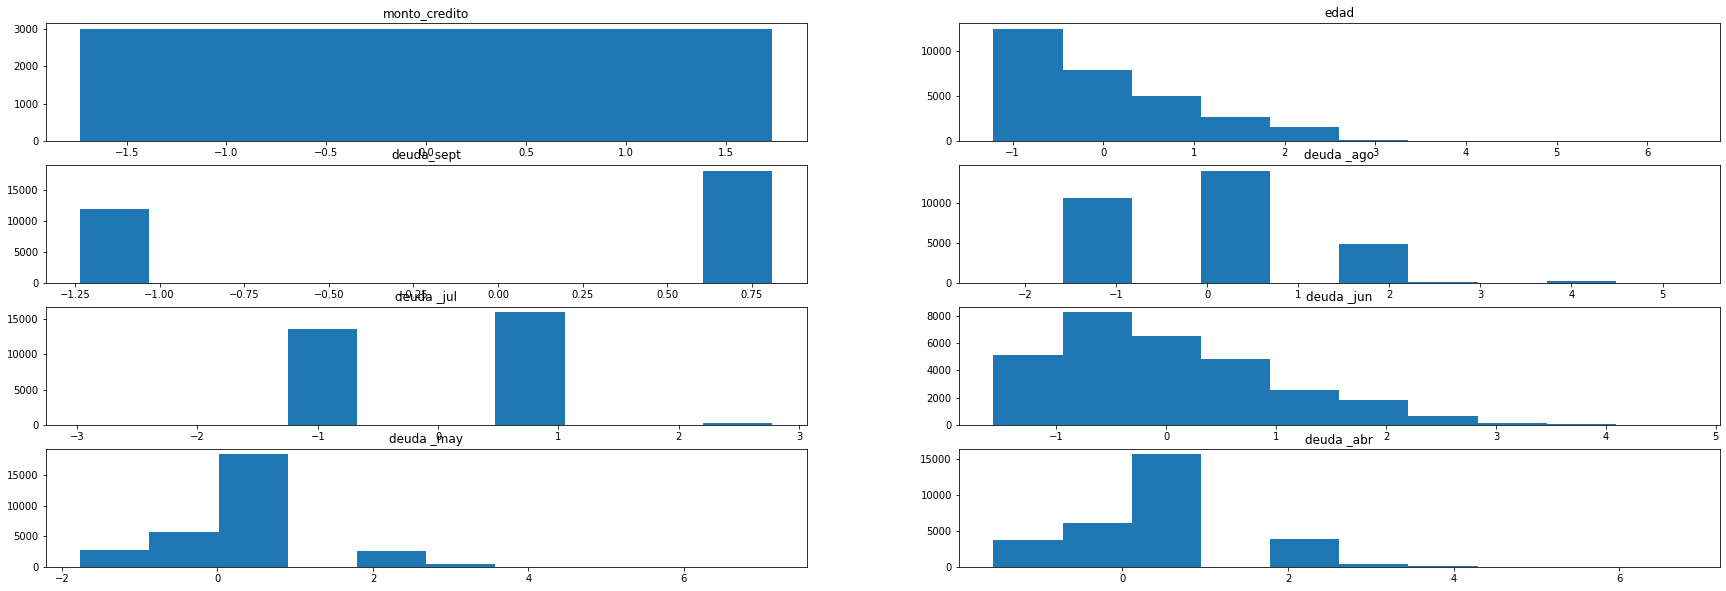

In [15]:
lista_de_numericas = numericas

grafica_df = df_escalado[[0,1,2,3,4,5,6,7]]
fig, axs = plt.subplots(4, 4, figsize=(30,10)) 

for i in range(len(lista_de_numericas)):
    plt.subplot(4,2,i+1)
    plot_1 = grafica_df[grafica_df.columns[i]]
    plt.hist(plot_1)
    plt.title(lista_de_numericas [i])
    
plt.show()


In [ ]:
sns.set() 
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(mi_pca.explained_variance_)+1),
    mi_pca.explained_variance_
    )
 
plt.plot(
    range(1,len(mi_pca.explained_variance_)+1),
    np.cumsum(mi_pca.explained_variance_),
    c='red',
    label='Sumatoria de varianza explicada')
 
plt.legend(loc='upper left')
plt.xlabel('Numero de componentes')
plt.ylabel('Varainza explicada con eignenvalores')
plt.title('Barplot sobre el metodo explained_variance_')
 
plt.show()

#Se observa que esta grafica tiene un error en las dimensiones, ya que la sumatoria de los componentes debe de dar como maxiom 1.
#Por esta razon se procede a buscar otro metodo de ploteo

# Por el momento, no deseamos imprimir pairplot por la dificultad de su interpretacion
#sns.pairplot(df_con_pca,hue = 'Y',diag_kind = "kde",kind = "scatter",palette = "husl") #Este pairplot dura como media hora ojo


In [ ]:
#Esta es la opcion 3
PC_components = np.arange(mi_pca.n_components_) + 1

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = mi_pca.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(mi_pca.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0,1)
plt.show()

#GRÁFICO 3

PC_components = np.arange(mi_pca.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = mi_pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(mi_pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)


In [ ]:
#sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
sns.jointplot(x = "PC1", y = "PC2", kind = "scatter", data = df_con_pca)
plt.show()


In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
columnas = ['PC1','PC2', 'PC3', 'PC4', 'PC5',
       'PC6', 'PC7']
print(columnas)
fig, axes = plt.subplots(2, 4)
k=0
print(columnas[0])
for name in columnas:
  plt.subplot(2,4,k+1) 
  plt.boxplot(df_con_pca[name], showmeans=True)
  plt.xlabel(name)
  k+=1

plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
columnas = ['genero','estado_civil', 'edad']
print(columnas)
fig, axes = plt.subplots(2, 4)
k=0
print(columnas[0])
for name in columnas:
  plt.subplot(1,3,k+1) 
  plt.boxplot(df_cleaned[name], showmeans=True)
  plt.xlabel(name)
  k+=1

plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
genero_label = ['mujer','hombre','otro']

plt.bar(genero_label, df_cleaned['genero'].value_counts(),color = ['orange','blue', 'red'])
plt.xlabel('Grafica de sexos')
  
plt.show()

In [ ]:
df_con_pca

In [ ]:
# Nos enfocamos en los primeros dos elemetnos del PCA
pca = PCA(n_components=8)
 

columnas_pca = pca.fit_transform(X_escalada)
 

pca_df = pd.DataFrame(data=columnas_pca,columns=['PC1', 'PC2','PC3', 'PC4','PC5','PC6','PC7','PC8'])
 
# map target names to PCA features   
target_names = {0.0:'CLIENTE NO CONFIABLE',1.0:'CLIENTE CONFIABLE'
}
 
pca_df['target'] = Y
pca_df['target'] = pca_df['target'].map(target_names)
 
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('Grrafica bidimensional de PCA')
plt.show()


Experimentar con diversos tipos de graficos me permitio observar primero la distribuion de elementos en los PCA Consderando que los pri ero 8 elemtnos del PCA contiene la informacion principal, puedo observar que las variables categoricas que correspondian a los pagos entre los meses de abril a septiembre de 2022, son las que tienen menos importancia, debido a que observando otra grafica, tiene mas peso elementos como el genero, que desde el principio del ejercicio, se observo que tenia una tendencia elevada en sua nalisisd escrptivo y estada mayormente, es decir con el 75% en la categoria 2, es decir correspondiente a las mujeres.

Para esto el PCA permite simplificar esta complejidad de identificacion e interpretacion. Con base en las graficas analizadas, tambien se observa que los primeros 3 componentes acumulan la mayoria de los elementos y finalmente, gracias a la grafica de caja, podemos observar que los datos estan aun muy disepersos dentro de sus vectores.

Personamente considero, que la relaci[on entre el monto de credito, fue lo que mas dificil de analizar en las graficas primero porque se debe de utilizar un tipo de escalado diferentes y ademas porquepara enfocarse en las cifras, considero que se debio de realizar otro tipo de analisis psoterior a este, por ejemplo, enfocarse en la edad del cliente y el monto asignado, con base en eso poder escalar los montos de creditos y realcionarlos con una edad, para justificar esto me baso en la correlacion entre estos elementos como a continuacion se observa


In [27]:
#df_cleaned['edad'].corr(df_cleaned​​['monto_credito'])

data = df_cleaned[['edad','monto_credito']]
correlation = data.corr(method='pearson')
print('correlacion entre edad y monto de credito asignado',correlation)

data = df_cleaned[['genero','monto_credito']]
correlation = data.corr(method='pearson')
print('correlacion entre el genero y monto de credito asignado',correlation)

data = df_cleaned[['estado_civil','monto_credito']]
correlation = data.corr(method='pearson')
print('correlacion entre el estado civil y monto de credito asignado',correlation)

correlacion entre edad y monto de credito asignado                    edad  monto_credito
edad           1.000000       0.144662
monto_credito  0.144662       1.000000
correlacion entre el genero y monto de credito asignado                  genero  monto_credito
genero         1.000000       0.024744
monto_credito  0.024744       1.000000
correlacion entre el estado civil y monto de credito asignado                estado_civil  monto_credito
estado_civil       1.000000      -0.108191
monto_credito     -0.108191       1.000000
